In [2]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

In [5]:
X_full = pd.read_csv("Training.csv")
X_test = pd.read_csv("Testing.csv")

X_full.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [6]:
X_full.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,0.0
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,NaN
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [7]:
X_full.shape

(4920, 134)

In [8]:
missing_data = X_full.isnull().sum()
missing_data[missing_data > 0]

Unnamed: 133    4920
dtype: int64

In [9]:
X_full.drop("Unnamed: 133", axis=1, inplace=True)

In [10]:
import matplotlib.pyplot as plt

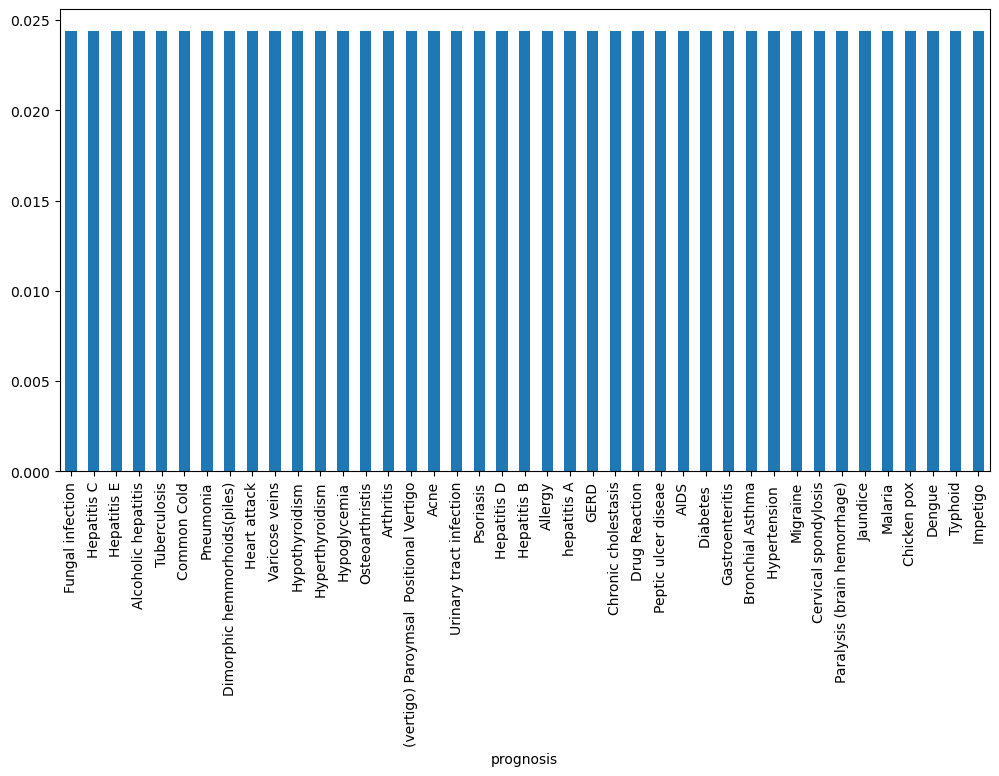

In [11]:
X_full["prognosis"].value_counts(normalize=True).plot(kind="bar", figsize=(12, 6))
plt.show()

In [12]:
X_test.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,...,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,0.166667,0.190476,0.023810,0.047619,0.023810,0.166667,0.142857,0.047619,0.047619,0.023810,...,0.023810,0.023810,0.023810,0.047619,0.023810,0.023810,0.023810,0.023810,0.047619,0.023810
std,0.377195,0.397437,0.154303,0.215540,0.154303,0.377195,0.354169,0.215540,0.215540,0.154303,...,0.154303,0.154303,0.154303,0.215540,0.154303,0.154303,0.154303,0.154303,0.215540,0.154303
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
X_test.shape

(42, 133)

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [15]:
# Prepare data
encoder = LabelEncoder()
X_full["prognosis"] = encoder.fit_transform(X_full["prognosis"])

X = X_full.drop("prognosis", axis=1).values
y = X_full["prognosis"].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=67, stratify=y)

In [16]:
rf = RandomForestClassifier()
params_grid = {
    "n_estimators": [100, 250, 500],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}
scoring = "f1_macro"
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=99)

# Grid Search
grid_search = GridSearchCV(
    rf,
    params_grid,
    scoring=scoring,
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [17]:
rf = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=2
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average="macro")

print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Macro Score: {f1:.4f}")


Accuracy: 1.0000
F1-Macro Score: 1.0000


In [18]:
import seaborn as sns

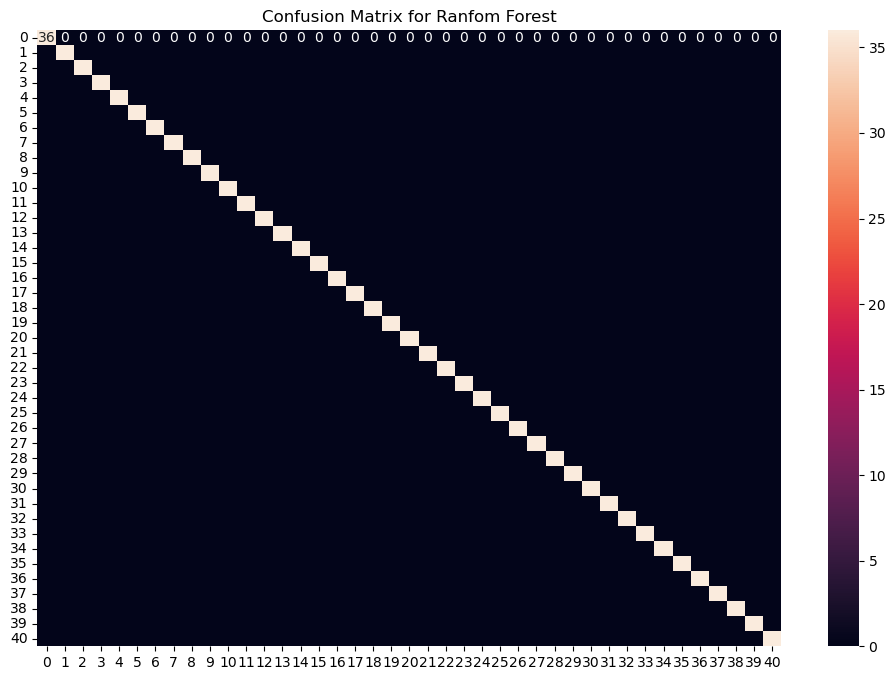

In [19]:
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix for Ranfom Forest")
plt.show()

In [20]:
X_test["prognosis"] = encoder.fit_transform(X_test["prognosis"])
X_test_ = X_test.drop("prognosis", axis=1).values
y_test_ = X_test["prognosis"].values

preds = rf.predict(X_test_)
accuracy = accuracy_score(y_test_, preds)
f1 = f1_score(y_test_, preds, average="macro")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Macro Score: {f1:.4f}")

Accuracy: 0.9762
F1-Macro Score: 0.9837


In [21]:
preds_labels = encoder.classes_[preds]
output = pd.DataFrame({'id': X_test.index,
                       'prognosis': preds_labels})
output.to_csv('submission.csv', index=False)

In [22]:
import pickle

# Save the Random Forest model
with open('disease_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

# Save the LabelEncoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

# Save the feature names (symptoms)
symptom_names = X_full.drop("prognosis", axis=1).columns.tolist()
with open('symptom_names.pkl', 'wb') as f:
    pickle.dump(symptom_names, f)

print("Model, encoder, and symptom names saved successfully!")
print(f"Model saved as: disease_model.pkl")
print(f"Encoder saved as: label_encoder.pkl")
print(f"Symptom names saved as: symptom_names.pkl")
print(f"Number of symptoms: {len(symptom_names)}")


Model, encoder, and symptom names saved successfully!
Model saved as: disease_model.pkl
Encoder saved as: label_encoder.pkl
Symptom names saved as: symptom_names.pkl
Number of symptoms: 132
